# Distinguishing Sentiments

### Observations:

##### 1.  In the last 100 tweets, the news was more positive than negative.
##### 2. BBC and CBS more consistently have positive compound scores.
##### 3. In recent tweets, CNN is the only news outlet with a negative average compound score. 

In [77]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.font_manager import FontProperties

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from tconfig import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [78]:
# target search term
target_user =("@BBC", "@CNN", "@CBS", "@FoxNews", "@nytimes")

# Counter
counter = 1

#Empty Dataframe 
sentiments = pd.DataFrame(columns = ["Name","Tweets Ago","Tweet","Compound", "Positive", "Negative", "Neutral", "Date"])

for target in target_user:
    
    #set counter
    counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get tweets from news feed
        response = api.user_timeline(target, page=x)

        # Loop through all tweets 
        for tweet in range(20):
            
            #set variables
            text =response[tweet]["text"]
            name =response[tweet]["user"]["name"]
            when =response[tweet]["created_at"]
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(text)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments=sentiments.append({"Name":name, "Date":when, "Tweet":text, "Tweets Ago": counter,
                                              "Compound":compound, "Positive":pos, "Negative":neg, "Neutral":neu}, ignore_index=True)
          
        
            # Add to counter 
            counter = counter + 1

In [79]:
sentiments.head()
# sentiments.to_csv("Womack_Distinguising_Sentiments.csv")

,Name,Tweets Ago,Tweet,Compound,Positive,Negative,Neutral,Date
0,BBC,1,"RT @BBCRadio2: It may be cold outside, but @BB...",0.3291,0.105,0.0,0.895,Sat Dec 02 21:59:04 +0000 2017
1,BBC,2,You might be carrying a pathogen right now. 😱☣...,0.0000,0.000,0.0,1.000,Sat Dec 02 20:00:05 +0000 2017
2,BBC,3,RT @BBCLookEast: Buddy and his new best bud fr...,0.6369,0.189,0.0,0.811,Sat Dec 02 19:57:21 +0000 2017
3,BBC,4,RT @BBCSport: FT Arsenal 1-3 Man Utd\n\nQuite ...,0.0000,0.000,0.0,1.000,Sat Dec 02 19:49:59 +0000 2017
4,BBC,5,RT @bbcstrictly: Breathtaking! There's just en...,0.5093,0.171,0.0,0.829,Sat Dec 02 19:48:25 +0000 2017


In [80]:
# Separate Sentiment analysis by news sourse

BBC = sentiments.loc[sentiments["Name"]== "BBC"]
CBS = sentiments.loc[sentiments["Name"]== "CBS"]
CNN = sentiments.loc[sentiments["Name"]== "CNN"]
FOX = sentiments.loc[sentiments["Name"]== "Fox News"]
NYT = sentiments.loc[sentiments["Name"]== "The New York Times"]

In [81]:
BBC.head()

,Name,Tweets Ago,Tweet,Compound,Positive,Negative,Neutral,Date
0,BBC,1,"RT @BBCRadio2: It may be cold outside, but @BB...",0.3291,0.105,0.0,0.895,Sat Dec 02 21:59:04 +0000 2017
1,BBC,2,You might be carrying a pathogen right now. 😱☣...,0.0000,0.000,0.0,1.000,Sat Dec 02 20:00:05 +0000 2017
2,BBC,3,RT @BBCLookEast: Buddy and his new best bud fr...,0.6369,0.189,0.0,0.811,Sat Dec 02 19:57:21 +0000 2017
3,BBC,4,RT @BBCSport: FT Arsenal 1-3 Man Utd\n\nQuite ...,0.0000,0.000,0.0,1.000,Sat Dec 02 19:49:59 +0000 2017
4,BBC,5,RT @bbcstrictly: Breathtaking! There's just en...,0.5093,0.171,0.0,0.829,Sat Dec 02 19:48:25 +0000 2017


In [82]:
# Get x and y coordinates and average compound for each of the three city types
BBC_compound = BBC["Compound"]
BBC_count = BBC["Tweets Ago"]
BBC_avg_compound = BBC["Compound"].mean()

CNN_compound = CNN["Compound"]
CNN_count = CNN["Tweets Ago"]
CNN_avg_compound = CNN["Compound"].mean()
                     
CBS_compound = CBS["Compound"]
CBS_count =CBS["Tweets Ago"]
CBS_avg_compound = CBS["Compound"].mean()
                     
FOX_compound = FOX["Compound"]
FOX_count = FOX["Tweets Ago"] 
FOX_avg_compound = FOX["Compound"].mean()

NYT_compound = NYT["Compound"]
NYT_count = NYT["Tweets Ago"]
NYT_avg_compound = NYT["Compound"].mean()

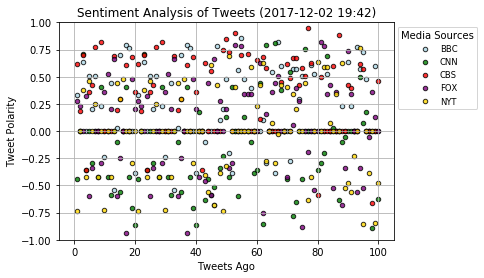

In [93]:
# Build the scatter plots for each news feed


plt.scatter(BBC_count,
            BBC_compound,
            s=20, c="lightblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")

plt.scatter(CNN_count, 
            CNN_compound, 
            s=20, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")

plt.scatter(CBS_count, 
            CBS_compound, 
            s=20, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")

plt.scatter(FOX_count, 
            FOX_compound, 
            s=20, c="purple", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="FOX")


plt.scatter(NYT_count, 
            NYT_compound, 
            s=20, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="NYT")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((-5,105))
plt.ylim((-1,1))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title ="Media Sources", 
                  labelspacing=0.5, bbox_to_anchor=(1, 1))

fig = plt.figure(1)
fig.savefig('100Scatter.png', bbox_inches='tight')

# Show plot
plt.show()

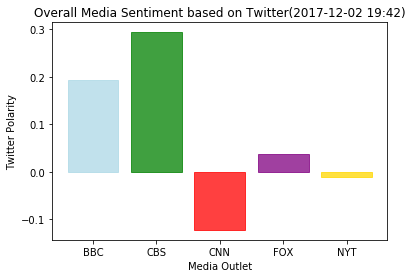

In [94]:
media_group =["BBC","CBS","CNN","FOX","NYT"]
compound = [BBC_avg_compound,CBS_avg_compound,CNN_avg_compound,FOX_avg_compound,NYT_avg_compound]

plt.title("Overall Media Sentiment based on Twitter({})".format(now))
plt.xlabel("Media Outlet")
plt.ylabel("Twitter Polarity")

barlist = plt.bar(media_group, compound,alpha=0.75, align="center")
barlist[0].set_color('lightblue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('purple')
barlist[4].set_color('gold')

# Save Figure
plt.savefig("Overall.png")

# Show plot
plt.show()


